<a href="https://colab.research.google.com/github/nikhilkumarreddy/guvi-assignment/blob/master/Task_1_Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Introduction to NLP basic techniques**



##Provide explanations for the code part provided in the tutorial by adding a text below the code cell.
###**Note**: your explanation must include how the code works and libraries used and why they are used.

###Students who are present in the class need to complete the activity1 and answer the question given at the end of tutorial or on the due date posted to canvas




# **Good Luck with the first NLP In class tasks ✌**

# Fundamentals of NLP: Tokenization


Natural language processing (NLP) has made substantial advances in the past few years due to the success of [modern techniques](https://nlpoverview.com/) that are based on [deep learning](https://en.wikipedia.org/wiki/Deep_learning). With the rise of the popularity of NLP and the availability of different forms of large-scale data, it is now even more imperative to understand the inner workings of NLP techniques and concepts, from first principles, as they find their way into real-world usage and applications that affect society at large. Building intuitions and having a solid grasp of concepts are both important for coming up with innovative techniques, improving research, and building safe, human-centered AI and NLP technologies.

In this first chapter, which is part of a series called **Fundamentals of NLP**, we will learn about some of the most important **basic concepts** that power NLP techniques used for research and building real-world applications. Some of these techniques include *lemmatization*, *stemming*, *tokenization*, and *sentence segmentation*. These are all important techniques to train efficient and effective NLP models. Along the way, we will also cover best practices and common mistakes to avoid when training and building NLP models. We also provide some exercises for you to keep practicing and exploring some ideas.


In every chapter, we will introduce the theoretical aspect and motivation of each concept covered. Then we will obtain hands-on experience by using bootstrap methods, industry-standard tools, and other open-source libraries to implement the different techniques. Along the way, we will also cover best practices, share important references, point out common mistakes to avoid when training and building NLP models, and discuss what lies ahead.

---

## Tokenization



With any typical NLP task, one of the first steps is to tokenize your pieces of text into its individual words/tokens (process demonstrated in the figure above), the result of which is used to create so-called vocabularies that will be used in the langauge model you plan to build. This is actually one of the techniques that we will use the most throughout this series but here we stick to the basics. Tokenization is a foundational step that transforms raw text into a structured format suitable for various NLP tasks and machine learning applications

Below I am showing you an example of a simple tokenizer without any following any standards. All it does is extract tokens based on a white space seperator.

Try to running the following code blocks.

In [ ]:
doc = "I love coding and writing"
for i, w in enumerate(doc.split(" ")):#enumerate() is used to iterate over a sequence while keeping track of both the index and corresponding value
    print("Token " + str(i) + ": " + w)

Token 0: I
Token 1: love
Token 2: coding
Token 3: and
Token 4: writing


All the code does is separate the sentence into individual tokens. The above simple block of code works well on the text I have provided. But typically, text is a lot noisier and complex than the example I used. For instance, if I used the word "so-called" is that one word or two words? For such scenarios, you may need more advanced approaches for tokenization. You can consider stripping away the "-" and splitting into two tokens or just combining into one token but this all depends on the problem and domain you are working on.

Another problem with our simple algorithm is that it cannot deal with extra whitespaces in the text. In addition, how do we deal with cities like "New York" and "San Francisco"?


---
**Q 1**: Copy the code from above and add extra whitespaces to the string value assigned to the `doc` variable and identify the issue with the code. Then try to fix the issue. Hint: Use `text.strip()` to fix the problem.

In [1]:
###  ENTER CODE HERE

doc = "I  love    coding    and     writing"
for i, w in enumerate(doc.split(" ")):
    print("Token " + str(i) + ": " + w)



###

Token 0: I
Token 1: 
Token 2: love
Token 3: 
Token 4: 
Token 5: 
Token 6: coding
Token 7: 
Token 8: 
Token 9: 
Token 10: and
Token 11: 
Token 12: 
Token 13: 
Token 14: 
Token 15: writing


In [2]:
# issue with the code is .. it is taking spaces as a token. That is not the right way to divide tokens


In [14]:
doc = "I  love    coding    and     writing"
doc =  doc.split()
doc = " ".join(doc)

for i, w in enumerate(doc.split(" ")):
    print("Token " + str(i) + ": " + w)


Token 0: I
Token 1: love
Token 2: coding
Token 3: and
Token 4: writing


In [ ]:
#used split function to remove extra spaces from the doc string and splited sentence and tokonized the sentence.

---

Tokenization can also come in different forms. For instance, more recently a lot of state-of-the-art NLP models such as [BERT](https://arxiv.org/pdf/1810.04805.pdf) make use of `subword` tokens in which frequent combinations of characters also form part of the vocabulary. This helps to deal with the so-called out of vocabulary (OOV) problem. We will discuss this in upcoming chapters, but if you are interested in reading more about this now, check this [paper](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/37842.pdf).

To demonstrate how you can achieve more reliable tokenization, we are going to use [spaCy](https://spacy.io/), which is an impressive and robust Python library for natural language processing. In particular, we are going to use the built-in tokenizer found [here](https://spacy.io/usage/linguistic-features#sbd-custom).

Run the code block below.

**spaCy**: spaCy is an open-source Python library for natural language processing (NLP). It provides tools to efficiently process and analyze text data, offering features like tokenization, part-of-speech tagging, named entity recognition, and more. Known for its speed and accuracy, spaCy is widely used in NLP tasks for extracting insights and information from text.

In [15]:
## required libraries that need to be installed
%%capture
!pip install -U spacy
#!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm

In [16]:
## import the libraries
import spacy #opensource lib used for tokenization,lemmatization and provides pre trained models
## load the pre trained language model
nlp = spacy.load("en_core_web_sm") #"en" indicates English, "core" suggests that it's a core language model, "web" refers to the source of the training data, and "sm" stands for "small"

## tokenization
doc = nlp("This is the so-called lemmatization")
for token in doc:
    print(token.text)

This
is
the
so
-
called
lemmatization


---
**NLTK** (Natural Language Toolkit) is a Python library that provides tools and resources for working with human language data, enabling tasks like text processing, analysis, and understanding. It's widely used for various natural language processing tasks, offering functions for tasks like tokenization, part-of-speech tagging, and more

In [17]:
import nltk
nltk.download('punkt')#Punkt is a pre-trained sentence tokenizer provided by NLTK that can intelligently split text into individual sentences
from nltk.tokenize import word_tokenize #word_tokenize function is used to split a piece of text into individual words or tokens
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

**Q 2**: Copy the code from above and extend  the code to print tokens from the given sentence that have a length greater than 5?

In [18]:
##CODE HERE

sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)

filtered_tokens = [token for token in tokens if len(token) > 5]


print(filtered_tokens)

["o'clock", 'Thursday', 'morning', 'Arthur']


---
**Gensim** is a Python library designed for topic modeling and document similarity analysis. It specializes in handling large text corpora efficiently. Gensim provides tools for tasks like topic modeling, word embedding, and document similarity calculation. It's widely used for uncovering hidden patterns in text data and generating insights from unstructured text.

In summary, Gensim is a powerful library in the field of natural language processing (NLP) that focuses on tasks related to text analysis and modeling, such as extracting topics from documents and creating word embeddings.

In [19]:
#genism work tokenization
!pip install gensim
from gensim.utils import tokenize
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed
liquid-fuel launch vehicle to orbit the Earth."""
list(tokenize(text))

['Founded',
 'in',
 'SpaceX',
 's',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 'planet',
 'species',
 'by',
 'building',
 'a',
 'self',
 'sustaining',
 'city',
 'on',
 'Mars',
 'In',
 'SpaceX',
 's',
 'Falcon',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth']

**Q 3**. Now based on above word tokenizations perform a sentence tokenization using spacy or nltk?

In [20]:
##CODE HERE

from nltk.tokenize import word_tokenize # here IM using nltk for tokenization
sentence = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed
liquid-fuel launch vehicle to orbit the Earth."""


tokens = nltk.word_tokenize(sentence)
tokens



['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 '’',
 's',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi-planet',
 'species',
 'by',
 'building',
 'a',
 'self-sustaining',
 'city',
 'on',
 'Mars',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 '’',
 's',
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid-fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth',
 '.']

All the code does is tokenize the text based on a pre-built language model.

Try putting different running text into the `nlp()` part of the code above. The tokenizer is quiet robust and it includes a series of built-in rules that deal with exceptions and special cases such as those tokens that contain puctuations like "`" and ".", "-", etc. You can even add your own rules, find out how [here](https://spacy.io/usage/linguistic-features#special-cases).

In a later chapter of the series, we will do a deep dive on tokenization and the different tools that exist out there that can simplify and speed up the process of tokenization to build vocabularies. Some of the tools we will explore are the [Keras Tokenizer API](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) and [Hugging Face Tokenizer](https://github.com/huggingface/tokenizers).  

---

**BeautifulSoup**: Beautiful Soup is a Python library used for web scraping. It helps extract data from HTML and XML documents by providing methods to parse and navigate their content. Beautiful Soup simplifies the process of extracting information from web pages, making it accessible for various data collection and analysis tasks.

In [21]:
#code block 1
#import the required libraries

from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

First, we will grab a web page content then we will analyze the text to see what the page is about.
We will use the urllib module to crawl the web page:

In [27]:
#code block 2

import urllib.request

#open and read the spacex data
response = urllib.request.urlopen('http://php.net/')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="icon" type="image/svg+xml" sizes="any" href="https://www.php.net/favicon.svg?v=2">\n <link rel="icon" type="image/png" sizes="196x196" href="https://www.php.net/favicon-196x196.png?v=2">\n <link rel="icon" type="image/png" sizes="32x32" href="https://www.php.net/favicon-32x32.png?v=2">\n <link rel="icon" type="image/png" sizes="16x16" href="https://www.php.net/favicon-16x16.png?v=2">\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico?v=2">\n\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type=

As you can see from the printed output, the result contains a lot of HTML tags that need to be
cleaned. We can use BeautifulSoup to clean the grabbed text like this:

In [28]:
#code block 3
#apply beautifulsoap(used for web scraping) and split the text
soup = BeautifulSoup(html,"html5lib") #"html5lib" parser is a robust parser that can handle poorly formatted HTML and produces a consistent and accurate representation of the document's structure.
text = soup.get_text(strip=True)
print(text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesPredefined AttributesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUser Submitted DataHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Spec

Now we have a clean text from the crawled web page.
Awesome, right? Finally, let’s convert that text into tokens by splitting the text like this:


In [30]:
#code block 4
#split the text into tokens
tokens = [t for t in text.split()]
print(tokens)
clean_tokens = tokens[:]
print(clean_tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesPredefined', 'AttributesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUser', 'Submitted', 'DataHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsCommand',

**Stopwords** are commonly used words that are filtered out from text during text preprocessing in natural language processing (NLP) tasks. These words are considered to be of little value in many NLP analyses because they are very frequent and don't carry significant meaning by themselves. Filtering out stopwords can help improve the efficiency of text analysis and reduce noise in the data.

Examples of stopwords in English include words like "the," "and," "is," "of," "in," "to," "for," "that," and so on.


**Count word frequency**
The text is much better now. Let’s calculate the frequency distribution of those tokens using
Python NLTK. There is a function in NLTK called FreqDist() does the job:

In [31]:
#code block 5

#remove the simpe repetitive english words using stopwords
sr = stopwords.words('english')
for token in tokens:
  if token in stopwords.words('english'):
     clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
print(freq)
#del_tokens = freq.copy()

<FreqDist with 384 samples and 1660 outcomes>


If you search the output, you’ll find that the most frequent token is PHP. You can plot a graph
for those tokens using plot function like this:


PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesPredefined:1
AttributesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUser:1
Submitted:1
DataHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

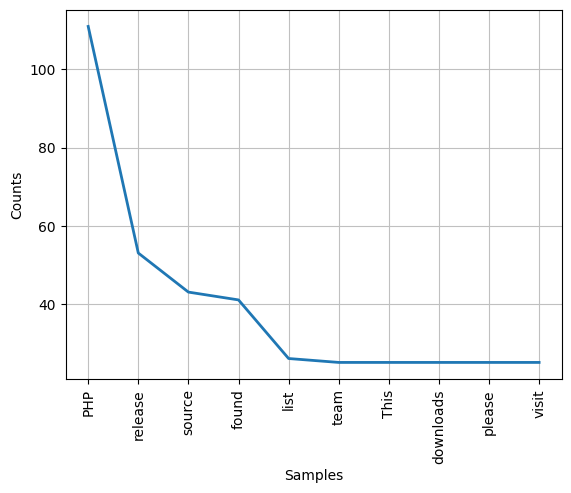

<Axes: xlabel='Samples', ylabel='Counts'>

In [32]:
#code block 6
#print and plot the 10 tokens with  high frequency
for key,val in freq.items():
    print (str(key) + ':' + str(val))
freq.plot(10,cumulative=False)

###**PIE CHART REPRESENTATION**

([<matplotlib.patches.Wedge at 0x78db65fc2e90>,
 [Text(0.7059599419954323, 0.8435760548390442, 'PHP'),
  Text(-0.616069297347919, 0.911295024053814, 'release'),
  Text(-1.0733760373864378, 0.24054912671757642, 'source'),
  Text(-0.9947928422600086, -0.469454152168509, 'found'),
  Text(-0.6232252259777147, -0.906416194529327, 'list'),
  Text(-0.2193753850452549, -1.0779027973042126, 'team'),
  Text(0.21088175984222318, -1.0795966299344617, 'This'),
  Text(0.6088750272615268, -0.916117460360447, 'downloads'),
  Text(0.9137133945714307, -0.6124768016674208, 'please'),
  Text(1.078758083065596, -0.21513018900340483, 'visit')])

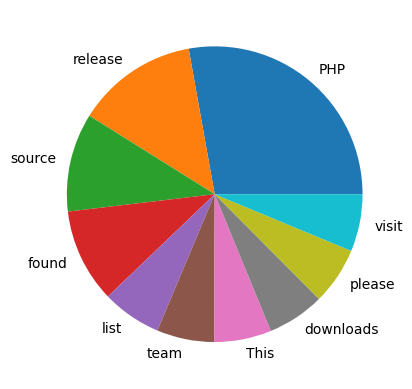

In [33]:
#pie chart representation for the 10 high frequency tokens from spaces web apge
import matplotlib.pyplot as plt
a = dict(freq)
sort = sorted(a, key=a.get,reverse=True)
count =0
b = {}
for i in sort:
    b[i] = a[i]
    count+= 1
    if count == 10:
       break
x = b.keys()
v = b.values()
plt.pie(v,labels=x)

###**BAR GRAPH REPRESENTATION**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Counter({'NLTK': 2, 'for': 2, '.': 2, 'is': 1, 'a': 1, 'powerful': 1, 'library': 1, 'natural': 1, 'language': 1, 'processing': 1, 'provides': 1, 'tools': 1, 'text': 1, 'analysis': 1})


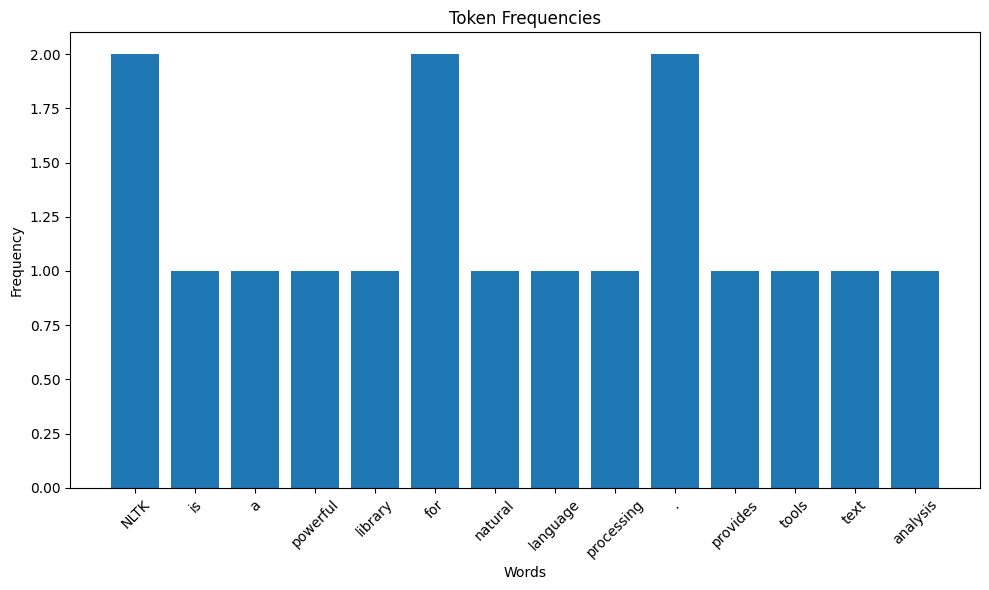

In [34]:
#EXAMPLE

import nltk
nltk.download('punkt')  # Download necessary data
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter

# Sample text
text = "NLTK is a powerful library for natural language processing. NLTK provides tools for text analysis."

# Tokenize the text
tokens = word_tokenize(text)

# Count word frequencies
word_counts = Counter(tokens)
print(word_counts)
# Separate words and their frequencies
words = list(word_counts.keys())
frequencies = list(word_counts.values())

# Create a bar graph
plt.figure(figsize=(10,6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Token Frequencies')
plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()

---
##Work on **code block 2** and use the same code concept below to parse data from any live website that talk about SpaceX Technologies and plot any graph for those tokens of your own choice which is not given above.
####Note: Please keep in mind that do not put all code in one block split in a fashionable way.

In [62]:
#CODE HERE

import urllib.request


#open and read the spacex data
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()

print(html)


b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>SpaceX - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-

In [ ]:
#using urllib extracted data from wikipedia webpage about spacex and read it the responces

In [63]:
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
print(text)

SpaceX - Wikipedia(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new RegExp('(^| )'+pref.replace(/-clientpref-\w+$|[^\w-]+/g,'')+'-clientpref-\\w+( |$)'),'$1'+pref+'$2');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","

In [ ]:
#using beautiful soup library cleaned our html page. here we used get_text function to clean.

In [64]:
#split the text into tokens
tokens = [t for t in text.split()]
print(tokens)
clean_tokens = tokens[:]
print(clean_tokens)

['SpaceX', '-', 'Wikipedia(function(){var', 'className="client-js', 'vector-feature-language-in-header-enabled', 'vector-feature-language-in-main-page-header-disabled', 'vector-feature-sticky-header-disabled', 'vector-feature-page-tools-pinned-disabled', 'vector-feature-toc-pinned-clientpref-1', 'vector-feature-main-menu-pinned-disabled', 'vector-feature-limited-width-clientpref-1', 'vector-feature-limited-width-content-enabled', 'vector-feature-custom-font-size-clientpref-0', 'vector-feature-client-preferences-disabled', 'vector-feature-client-prefs-pinned-disabled', 'vector-toc-available";var', 'cookie=document.cookie.match(/(?:^|;', ")enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new", "RegExp('(^|", ")'+pref.replace(/-clientpref-\\w+$|[^\\w-]+/g,'')+'-clientpref-\\\\w+(", '|$)\'),\'$1\'+pref+\'$2\');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable

In [65]:
#remove the simpe repetitive english words using stopwords
sr = stopwords.words('english')
for token in tokens:
  if token in stopwords.words('english'):
     clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
print(freq)


<FreqDist with 5361 samples and 11499 outcomes>


In [ ]:
#using stopwords from nltk .. stopwords are generated and frequenct dictionary was generated

In [66]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt


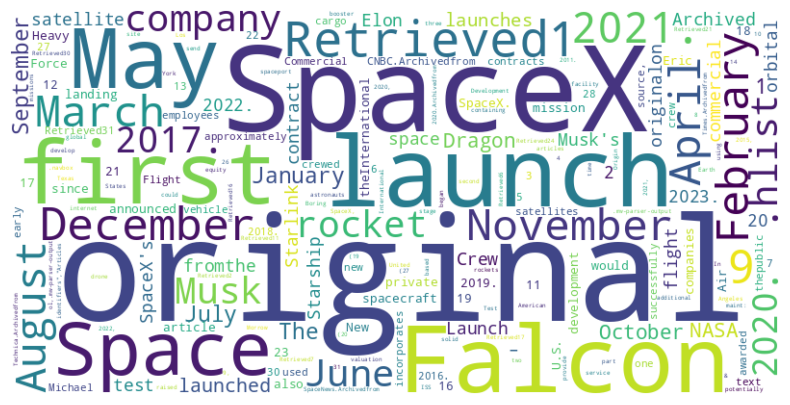

In [67]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
#WordCloud was generated and big front of text is more frequently occurred word in the tokens, spacex, falcon... etc

#What do you understand by the tutorial. Explain in details?
-->

Learned about Tokenization, spotwords and open source libraries which supports it.



1.   nltk
2.   scipy
3.   genism

Tokenization is the process of breaking up information into smaller chunks, called tokens. These symbols can be words, phrases, or other meaningful objects. Tokenization aims to make data easier to analyze, manage, and understand. Tokenization is an important step in natural language processing (NLP) and information mining tasks.

NLTK is a powerful Python library for working with human language data. It provides tools for various NLP tasks, including tokenization, stemming, lemmatization, part-of-speech tagging, and more. NLTK is widely used for research and education in the field of NLP, and it offers a rich set of resources and pre-trained models.

Gensim is an open-source library for topic modeling and document similarity analysis. It is designed to work with large text corpora and focuses on unsupervised learning algorithms. Gensim provides implementations for various models, such as Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA), making it a popular choice for extracting meaningful information from large textual datasets.

Stopwords are common words that are often removed during text preprocessing to focus on the more meaningful words in a document. These words, such as "and," "the," "is," etc., are considered to be of low informational value as they occur frequently in most texts. Libraries like NLTK provide predefined lists of stopwords that can be used for filtering during text analysis.

Word count refers to the total number of words in a document or a piece of text. It is a simple but valuable metric that provides insights into the document's length and complexity. Word count can be useful in various contexts, such as determining document readability, analyzing writing style, or as a preprocessing step for more advanced NLP tasks.


Pie charts and bar charts are valuable visual tools for showing the frequency distribution of tokens in a data set. The pie chart effectively displays the relative position of each token, with each field representing the frequency of a unique token. This facilitates a quick comparison of contributions and helps identify which tokens have the most potential. On the other hand, a bar chart helps to show the absolute frequency of each token, allowing a direct comparison with the raw counts. The height of each bar corresponds to the frequency of a particular token, making it easier to understand the pattern and distribution. Both visualizations make complex frequency data clear and accessible, making it easy for technical and non-technical audiences to interpret and gain meaningful insights






In [68]:
#end